In [2]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

In [3]:
df.columns #컬럼 살펴보기

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:

"""
이 데이터들을 가지고 몇가지 회귀모델을 만들어보고 모델의 성능을 평가하기 위해 train/test 데이터셋으로 나누기
우리가 정말 관심있게 봐야하느것은 훈련데이터를 잘 맞추는것이아니라 테스트데이터를 잘 맞추는 것이다
데이터를 훈련/테스트 데이터로 나누어야 우리가 만든 모델의 예측 성능을 제대로 평가할 수 있다
"""

#데이터 나눠보기
len(df)*75

109500

In [6]:
#train/test 데이터를 sample 메소드를 사용해 나눠보기
train = df.sample(frac=0.75, random_state=42)
test = df.drop(train.index)

#확인
train.head()

#길이비교
len(train),len(test)

(1095, 365)

In [13]:
#다중선형회귀모델을 학습해보기

"""
이전 강의에서 배운것 처럼
1.기준모델과 (특성없음)
2.단순선형회귀 모델을 만들고 (특성 한개 사용)
3.2개 이상의 특성들을 사용하는 다중선형회귀 모델 사용)
"""

#1.기준모델
train['SalePrice'].mean()

#label 정의
target = 'SalePrice'
y_train = train[target]
y_test = test[target]

#평균값으로 예측
predit = y_train.mean()
predit

#기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predit] * len(y_train)
mae = mean_absolute_error(y_train,y_pred)

print(f'훈련에러 {mae:.2f}')

#테스트 에러
y_pred = [predit] * len(y_test)
mae = mean_absolute_error(y_test,y_pred)
print(f'테스트에러 {mae:.2f}')

훈련에러 58343.44
테스트에러 54552.73


Text(0.5, 1.0, 'housing prices')

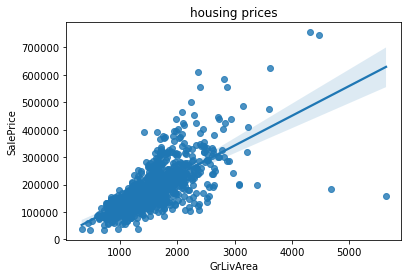

In [15]:
#scikit-learn 을 사용해서 단순선형 회귀 모델 만들어보기
#GrLivArea,SalePrice 를 사용해서 scatterplot으로 OLS 라인 그려보기
import seaborn as sns
sns.regplot(x=train['GrLivArea'],y=train['SalePrice']).set_title('housing prices')

In [18]:
#먼저 단순선형회귀 모델을 만들어보기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

feature = ['GrLivArea']
X_train = train[feature]
X_test =test[feature]

#모델 fit
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train,y_pred)
print(f'훈련 에러: {mae:.2f}')

#테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 38454.48
테스트 에러: 35399.14


/var/folders/xg/ygt1lc156px50m3tv0h1yd2m0000gn/T/ipykernel_2095/3235514030.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


Text(0.5, 0.98, 'Housing Prices')

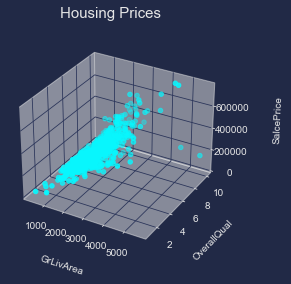

In [24]:
"""
다중선형회귀모델 학습 (특성 2개 이상)
"""

#먼저 OverallQual 특성을 추가하여 그래프를 확인해보기
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import mplcyberpunk
plt.style.use('cyberpunk')
fig = plt.figure()

ax = fig.gca(projection = '3d')

ax.scatter(train['GrLivArea'], train['OverallQual'], train['SalePrice'])
ax.set_xlabel('GrLivArea',labelpad=12)
ax.set_ylabel('OverallQual',labelpad=10)
ax.set_zlabel('SalcePrice',labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)


In [26]:
#특성 설정
features = ['GrLivArea','OverallQual']
X_train = train[features]
X_test = test[features]

#모델 fit
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train,y_pred)
print(f'훈련 에러: {mae:.2f}')

#테스트 데이터 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 29598.50
훈련 에러: 26336.96


In [29]:
#절편 과 계수들 구하기
print(model.intercept_, model.coef_)

#회귀식을 만들어 보기
b0 = model.intercept_
b1,b2 = model.coef_

print(f'y = {b0:.0f} + {b1:0f}x\u2081 + {b2:0f}x\u2082')


-103359.12178402944 [   53.349987   33429.80820505]
y = -103359 + 53.349987x₁ + 33429.808205x₂


In [ ]:
"""
과적합 과 과소적합
테스트데이터에서 만들어내는 오차를 일반화 오차라고 부릅니다
훈련데이터에서와 같이 테스트데이터에서도 좋은 성능을 내는 모델은 일반화가 잘 된 모델이라고 부릅니다
모델이 너무 훈련데이터에 과하게 학습을 하지 않도록 하는 많은 일반화 방법들이 있다

과적합은 모델이 훈련데이터에만 특수한 성질을 과하게 학습해 일반화를 못해 결국 테스트데이터에서 오차가 커지는 현상
과소적합 훈련데이터에 과적합도 못하고 일반화 성질도 학습하지 못한채, 훈련/테스트 데이터 모두에서 오차가 크게 나는것

분산/편향 트레이드오프
과/소적합은 오차의 편향(Bias)과 분산(Variance)개념과 관계가 있습니다.
분산이 높은경우는, 모델이 학습 데이터의 노이즈에 민감하게 적합하여 테스트데이터에서 일반화를 잘 못하는 경우 즉 과적합 상태입니다.
편향이 높은경우는, 모델이 학습 데이터에서, 특성과 타겟 변수의 관계를 잘 파악하지 못해 과소적합 상태입니다
"""
